# Exercises from Session 9

1) Change the initial conditions to be on the order of [M]. What impact does this have on the solution? (Plot the lines again.)


2) Select two rate constants to change and document your modifications. What are the impacts on the chemical evolution and steady state concentration? 

3) Change the constants to be appropriate for 30 km. What do you notice about how much time it takes to reach steady state $O_3$ concentrations?


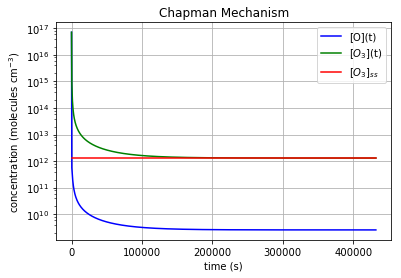

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants (found in S+P 5.1)
### concentration constants
M = 7.1e16
O2 = 0.21*M

### rate constants
jO2 = 5e-10 
jO3 = 1.9e-3
k2 = 9.1e-34
k4 = 2.2e-15

# Initial conditions
### guess based on the concentration of molecules in the atmosphere
initial_state = [M,M]

# Set the number of iterations and time period for simulation 
odeIterations = 1000
endtime = 3600*24*5
timeperiod = np.linspace(0.0, endtime, odeIterations)    


# Definition of system of ordinary differential equations
def deriv(conc, t):
     O = conc[0]
     O3 = conc[1]
     conc = [2*jO2*O2-k2*O*O2*M + jO3*O3-k4*O*O3, k2*O*O2*M - jO3*O3-k4*O*O3]
     return conc

# Use of scipy.integrate to function to solve 
sol = odeint(deriv, initial_state, timeperiod,mxstep=10000)

# Steady state value 
### Derived analytically considering the values of the rate constants and relative concentrations
O3ssval = 0.21*(k2*jO2/(k4*jO3))**0.5*M**1.5
O3ss = np.ones(len(timeperiod))*O3ssval

# Plot
plt.semilogy(timeperiod, sol[:,0], 'b', label='[O](t)')
plt.semilogy(timeperiod, sol[:,1], 'g', label='[$O_3$](t)')
plt.semilogy(timeperiod, O3ss,'r',label='[$O_3$]$_{ss}$')
plt.legend(loc='best')
plt.title('Chapman Mechanism')
plt.xlabel('time (s)')
plt.ylabel('concentration (molecules cm$^{-3}$)')

plt.grid()
plt.show()

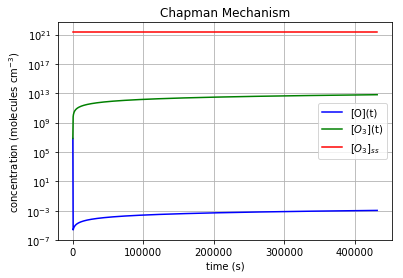

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants (found in S+P 5.1)
### concentration constants
M = 7.1e16
O2 = 0.21*M

### rate constants
jO2 = 5e-10 
jO3 = 1.9e-3
k2 = 1e-20 # original 9.1e-34
k4 = 1e-20 # original 2.2e-15

# Initial conditions
### guess based on the concentration of molecules in the atmosphere
initial_state = [1e-10*M,1e-10*M]

# Set the number of iterations and time period for simulation 
odeIterations = 1000
endtime = 3600*24*5
timeperiod = np.linspace(0.0, endtime, odeIterations)    


# Definition of system of ordinary differential equations
def deriv(conc, t):
     O = conc[0]
     O3 = conc[1]
     conc = [2*jO2*O2-k2*O*O2*M + jO3*O3-k4*O*O3, k2*O*O2*M - jO3*O3-k4*O*O3]
     return conc

# Use of scipy.integrate to function to solve 
sol = odeint(deriv, initial_state, timeperiod,mxstep=10000)

# Steady state value 
### Derived analytically considering the values of the rate constants and relative concentrations
O3ssval = 0.21*(k2*jO2/(k4*jO3))**0.5*M**1.5
O3ss = np.ones(len(timeperiod))*O3ssval

# Plot
plt.semilogy(timeperiod, sol[:,0], 'b', label='[O](t)')
plt.semilogy(timeperiod, sol[:,1], 'g', label='[$O_3$](t)')
plt.semilogy(timeperiod, O3ss,'r',label='[$O_3$]$_{ss}$')
plt.legend(loc='best')
plt.title('Chapman Mechanism')
plt.xlabel('time (s)')
plt.ylabel('concentration (molecules cm$^{-3}$)')

plt.grid()
plt.show()

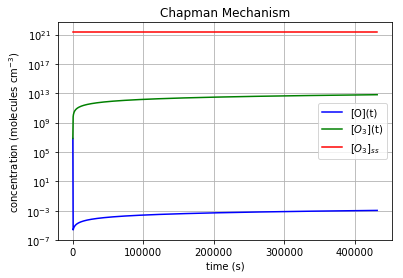

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants (found in S+P 5.1)
### concentration constants
M = 7.1e16
O2 = 0.21*M

### rate constants
jO2 = 5e-10 
jO3 = 1.9e-3
k2 = 1e-20 # original 9.1e-34
k4 = 1e-20 # original 2.2e-15

# Initial conditions
### guess based on the concentration of molecules in the atmosphere
initial_state = [1e-10*M,1e-10*M]

# Set the number of iterations and time period for simulation 
odeIterations = 1000
endtime = 3600*24*5
timeperiod = np.linspace(0.0, endtime, odeIterations)    


# Definition of system of ordinary differential equations
def deriv(conc, t):
     O = conc[0]
     O3 = conc[1]
     conc = [2*jO2*O2-k2*O*O2*M + jO3*O3-k4*O*O3, k2*O*O2*M - jO3*O3-k4*O*O3]
     return conc

# Use of scipy.integrate to function to solve 
sol = odeint(deriv, initial_state, timeperiod,mxstep=10000)

# Steady state value 
### Derived analytically considering the values of the rate constants and relative concentrations
O3ssval = 0.21*(k2*jO2/(k4*jO3))**0.5*M**1.5
O3ss = np.ones(len(timeperiod))*O3ssval

# Plot
plt.semilogy(timeperiod, sol[:,0], 'b', label='[O](t)')
plt.semilogy(timeperiod, sol[:,1], 'g', label='[$O_3$](t)')
plt.semilogy(timeperiod, O3ss,'r',label='[$O_3$]$_{ss}$')
plt.legend(loc='best')
plt.title('Chapman Mechanism')
plt.xlabel('time (s)')
plt.ylabel('concentration (molecules cm$^{-3}$)')

plt.grid()
plt.show()

## Exercise Answers

1) What impact does this have on the solution? (Plot the lines again.---This does not impact the final solution. It only impacted the approach/time the solver took to reach the final solution. However, for some problems, for example those with local minima and maxima, the initial guess might have a large effect on convergence or accuracy of the solution.


2) Select two rate constants to change and document your modifications. What are the impacts on the chemical evolution and steady state concentration?---I set both k2 and k4 to 1e-20. The result was a slow increase to steady state for ozone of ~1e21, well beyond the length of time considered in the model. The increase in O3 from the baseline model of ~1e12 is coupled with a decrease in O to ~1e-3, which is in line with intuition because O3 would need to consume O for its concentration to rise.

3) Change the constants to be appropriate for 30 km. What do you notice about how much time it takes to reach steady state $O_3$ concentrations?---It takes longer to reach steady state, but the SS values remain unchanged.
